In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\Ahmed\Downloads\books\books.csv')
print(df.head())

   book_id  goodreads_book_id  best_book_id   work_id  books_count       isbn  \
0        1            2767052       2767052   2792775          272  439023483   
1        2                  3             3   4640799          491  439554934   
2        3              41865         41865   3212258          226  316015849   
3        6           11870085      11870085  16827462          226  525478817   
4       12           13335037      13335037  13155899          210   62024035   

         isbn13                      authors  original_publication_year  \
0  9.780439e+12              Suzanne Collins                     2008.0   
1  9.780440e+12  J.K. Rowling, Mary GrandPré                     1997.0   
2  9.780316e+12              Stephenie Meyer                     2005.0   
3  9.780525e+12                   John Green                     2012.0   
4  9.780062e+12                Veronica Roth                     2011.0   

                             original_title  ... ratings_count

In [5]:
df = pd.read_csv(r'C:\Users\Ahmed\Downloads\books\books.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354 entries, 0 to 1353
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   book_id                    1354 non-null   int64  
 1   goodreads_book_id          1354 non-null   int64  
 2   best_book_id               1354 non-null   int64  
 3   work_id                    1354 non-null   int64  
 4   books_count                1354 non-null   int64  
 5   isbn                       1302 non-null   object 
 6   isbn13                     1310 non-null   float64
 7   authors                    1354 non-null   object 
 8   original_publication_year  1351 non-null   float64
 9   original_title             1302 non-null   object 
 10  title                      1354 non-null   object 
 11  language_code              1245 non-null   object 
 12  average_rating             1354 non-null   float64
 13  ratings_count              1354 non-null   int64

In [6]:
df = pd.read_csv(r'C:\Users\Ahmed\Downloads\books\books.csv')
sel_cols = ['title', 'authors', 'original_publication_year', 'average_rating', 'ratings_count', 'small_image_url']
df = df[sel_cols]

In [9]:
authors = df.authors.unique()
jkr = [i for i in authors if i.find('J.K. Rowling') != -1]
jkr_books = df.loc[df.authors.isin(jkr)]
all_titles = jkr_books.title.unique()
hp_titles = [i for i in all_titles if i.find('Harry Potter and ') != -1]
hp_books = jkr_books.loc[jkr_books.title.isin(hp_titles)]
hp_books = hp_books.sort_values(by=['original_publication_year'], ascending=True)
hp_books

,title,authors,original_publication_year,average_rating,ratings_count,small_image_url
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",1997.0,4.44,4602479,https://images.gr-assets.com/books/1474154022s...
9,Harry Potter and the Chamber of Secrets (Harry...,"J.K. Rowling, Mary GrandPré",1998.0,4.37,1779331,https://images.gr-assets.com/books/1474169725s...
6,Harry Potter and the Prisoner of Azkaban (Harr...,"J.K. Rowling, Mary GrandPré, Rufus Beck",1999.0,4.53,1832823,https://images.gr-assets.com/books/1499277281s...
10,Harry Potter and the Goblet of Fire (Harry Pot...,"J.K. Rowling, Mary GrandPré",2000.0,4.53,1753043,https://images.gr-assets.com/books/1361482611s...
8,Harry Potter and the Order of the Phoenix (Har...,"J.K. Rowling, Mary GrandPré",2003.0,4.46,1735368,https://images.gr-assets.com/books/1387141547s...
12,Harry Potter and the Half-Blood Prince (Harry ...,"J.K. Rowling, Mary GrandPré",2005.0,4.54,1678823,https://images.gr-assets.com/books/1361039191s...
11,Harry Potter and the Deathly Hallows (Harry Po...,"J.K. Rowling, Mary GrandPré",2007.0,4.61,1746574,https://images.gr-assets.com/books/1474171184s...


C:\Users\Ahmed\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


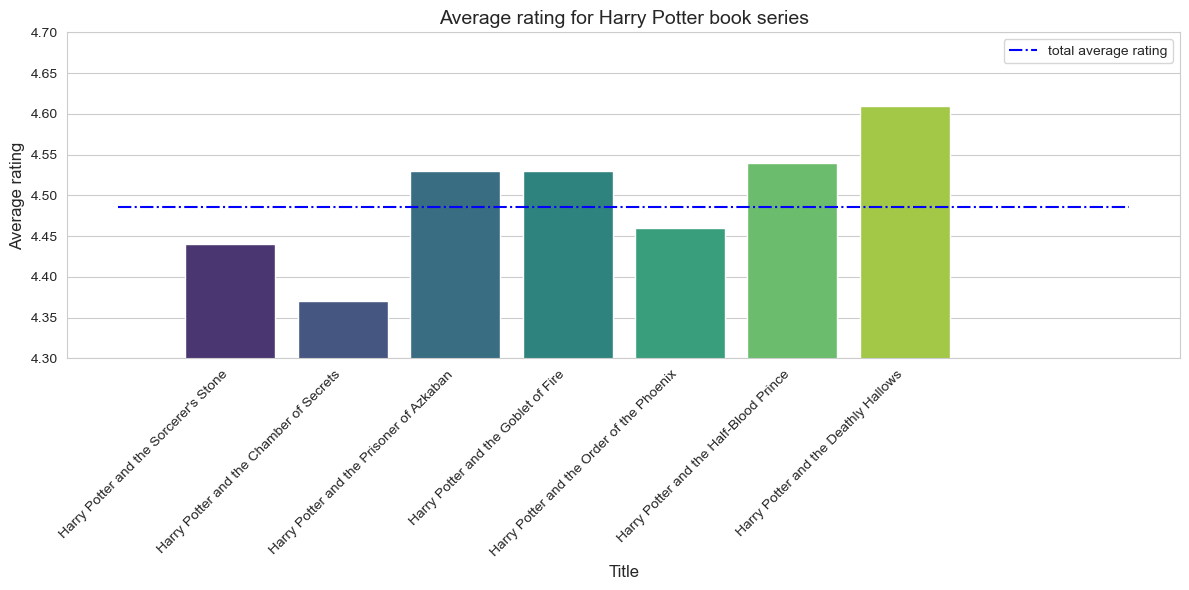

In [11]:
titles = hp_books.title.tolist()
titles = [title[:title.find(' (')] for title in titles]

weighted_avg = (hp_books.average_rating * hp_books.ratings_count).sum() / hp_books.ratings_count.sum()

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=titles, y=hp_books.average_rating, palette="viridis")
plt.xlabel('Title', fontsize=12)
plt.ylabel('Average rating', fontsize=12)
plt.ylim((4.3, 4.7))
plt.hlines(weighted_avg, xmin=-1, xmax=8, color='blue', linestyles='dashdot', label='total average rating')
plt.title('Average rating for Harry Potter book series', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend()
plt.show()